# Regresión Lineal vs Árbol de decisión


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [3]:
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")

In [4]:
X = penguins.drop(["body_mass_g"], axis=1)
X.rename(columns={"target":"species"}, inplace=True)
y = penguins["body_mass_g"]


In [5]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X["species"]):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [10]:
# Entrenar regresión linal
lr = LinearRegression()
lr.fit(train_set, train_y_set)

LinearRegression()

In [12]:
train_set.shape

(259, 9)

In [11]:
# Interpretar coeficientes
lr.coef_

array([   4.15715165,   39.5923484 ,   43.75709328,   43.97919523,
        -74.00306353,   74.00306353,  187.43580026, -157.77917259,
        -29.65662767])

In [13]:
lr.intercept_

-5537.225808751772

In [14]:
train_set.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species,FEMALE,MALE,Biscoe,Dream,Torgersen
177,54.2,20.8,201.0,1.0,0.0,1.0,0.0,1.0,0.0
117,41.4,18.5,202.0,0.0,0.0,1.0,0.0,0.0,1.0
268,45.0,15.4,220.0,2.0,1.0,0.0,1.0,0.0,0.0
17,35.9,19.2,189.0,0.0,1.0,0.0,1.0,0.0,0.0
185,53.5,19.9,205.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Pendiente resolver conlinealidad entre FEMALE/MALE y Biscoe/Dream/Torgensen
# COnvertir species en dos variables

In [16]:
# Predecir el primer elemento del test y comprobar que es correcto
lr.predict(test_set[:1])

array([3880.72306859])

In [24]:
(test_set[:1]*lr.coef_).sum(axis=1) + lr.intercept_

165    3880.723069
dtype: float64

In [27]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
root_mean_squared_error(test_y_set, lr.predict(test_set))

415.5346368882788

In [28]:
mean_absolute_error(test_y_set, lr.predict(test_set))

334.9414477814181

In [53]:
# Entrenar modelo
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=2, random_state=42)

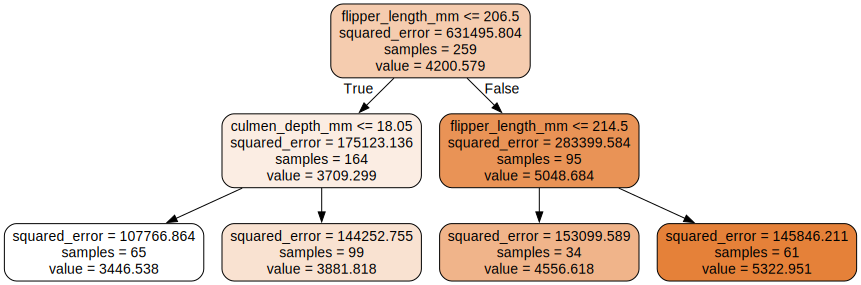

In [54]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [ ]:
# Interpretar gráfico

In [55]:
# Hacer una predicción del primer elemento del test y comprobar
tree_reg.predict(test_set[:1])

array([3881.81818182])

In [56]:
test_set[:1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species,FEMALE,MALE,Biscoe,Dream,Torgersen
165,49.2,18.2,195.0,1.0,0.0,1.0,0.0,1.0,0.0


In [57]:
# Comparar el error train y test
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
root_mean_squared_error(test_y_set, tree_reg.predict(test_set))

412.6829732827948

In [58]:
mean_absolute_error(test_y_set, tree_reg.predict(test_set))

328.50449920971397

In [ ]:
# ¿Qué pasa si cambiamos la semilla/orden de los datos en cada modelo?

In [59]:
# Comprueba el árbol de decisión sin ningún hiperparámetro
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set, train_y_set)


DecisionTreeRegressor()

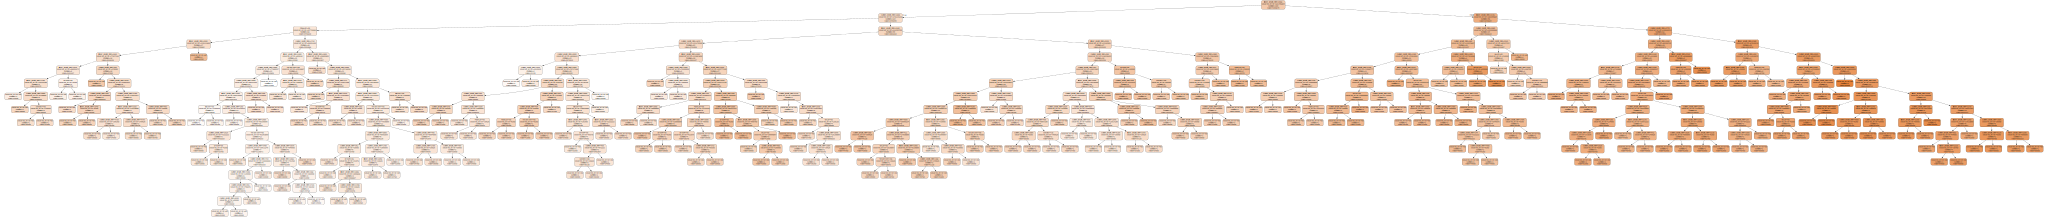

In [60]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [62]:
root_mean_squared_error(test_y_set, tree_reg.predict(test_set))

499.2012851314819

In [63]:
root_mean_squared_error(train_y_set, tree_reg.predict(train_set))

0.0